## Importing and adjusting the dataset ##

In [91]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [53]:
#use df as basis to start all exploration
df = pd.read_csv(r"C:\Users\letru\Documents\Flatiron\Phase-3-Project\dsc-phase-3-project/Terry_stops.csv")

In [54]:
new_df = df.copy()
new_df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,2.015000e+13,101039,Field Contact,None,6613,1971,M,Not Specified,...,13:46:00,-,-,-,WEST PCT 2ND W - QUEEN,N,-,-,-,-
1,-,-1,2.015000e+13,101562,Field Contact,None,7582,1966,M,Hispanic or Latino,...,4:08:00,-,-,-,SOUTH PCT 1ST W - R/S RELIEF,N,Y,-,-,-
2,-,-1,2.015000e+13,54348,Field Contact,None,6081,1962,M,White,...,2:47:00,-,-,-,NORTH PCT 3RD W - BOY,N,-,North,B,B3
3,-,-1,2.014000e+13,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
4,-,-1,2.015000e+13,28806,Field Contact,None,5670,1965,M,White,...,7:59:00,-,-,-,NaN,N,N,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47991,56 and Above,24919600373,2.021000e+13,24917463006,Field Contact,-,8386,1986,M,White,...,12:39:30,HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT),#NAME?,911,SOUTHWEST PCT 2ND W - WILLIAM,N,N,SouthWest,W,W2
47992,56 and Above,25405115029,2.021000e+13,25405364726,Field Contact,-,8633,1988,M,Black or African American,...,15:37:06,DIST - IP/JO - DV DIST - NO ASLT,#NAME?,911,WEST PCT 2ND W - K/Q RELIEF,N,N,West,K,K3
47993,56 and Above,25405630254,2.021000e+13,25405654732,Field Contact,-,7456,1979,M,White,...,17:41:32,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),#NAME?,911,NORTH PCT 2ND W - JOHN RELIEF,N,N,North,U,U1
47994,56 and Above,25513841558,2.021000e+13,25513816266,Field Contact,-,8609,1997,M,Two or More Races,...,5:55:58,HAZ - IMMINENT THRT TO PHYS SAFETY (NO HAZ MAT),#NAME?,"TELEPHONE OTHER, NOT 911",EAST PCT 1ST W - GEORGE (CHARLIE),N,N,West,K,K2


This data was is based in Seattle from 2015 - present.

In [55]:
new_df = df[['Subject Age Group', 'Subject ID', 'Stop Resolution',
         'Weapon Type', 'Officer ID', 'Officer YOB', 
         'Officer Gender', 'Officer Race', 'Subject Perceived Race', 
         'Subject Perceived Gender', 'Reported Date', 'Initial Call Type','Call Type',
         'Officer Squad', 'Arrest Flag', 'Frisk Flag',
         'Precinct', 'Sector', 'Beat' ]]

In [56]:
new_df.columns = ['subject_age', 'subject_id', 'stop_resolution',
         'weapon_type', 'officer_id', 'officer_age', 
         'officer_gender', 'officer_race', 'subject_race',
         'subject_gender', 'date', 'initial_call_type', 'call_type',
         'officer_squad', 'arrest', 'frisk',
         'precinct', 'sector', 'beat' ]

In [57]:
new_df = new_df.astype({'subject_age': 'category', 'officer_gender':'category', 
                'officer_race': 'category', 'subject_race':'category', 
                'subject_gender':'category', 'date':'datetime64','arrest':'category', 
                'frisk':'category','precinct':'category', 'sector':'category',
                'beat': 'category'})

In [58]:
new_df.replace('-', np.nan, inplace = True)

In [59]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47996 entries, 0 to 47995
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   subject_age        46433 non-null  category      
 1   subject_id         47996 non-null  int64         
 2   stop_resolution    47996 non-null  object        
 3   weapon_type        35428 non-null  object        
 4   officer_id         47972 non-null  object        
 5   officer_age        47996 non-null  int64         
 6   officer_gender     47996 non-null  category      
 7   officer_race       47996 non-null  category      
 8   subject_race       46146 non-null  category      
 9   subject_gender     47761 non-null  category      
 10  date               47996 non-null  datetime64[ns]
 11  initial_call_type  34792 non-null  object        
 12  call_type          34792 non-null  object        
 13  officer_squad      47391 non-null  object        
 14  arrest

## Exploring the data

In [85]:
#dates of encounters
date = new_df.copy()
date.set_index('date', inplace=True)
date['count']=1
date

,subject_age,subject_id,stop_resolution,weapon_type,officer_id,officer_age,officer_gender,officer_race,subject_race,subject_gender,initial_call_type,call_type,officer_squad,arrest,frisk,precinct,sector,beat,count
date,,,,,,,,,,,,,,,,,,,
2015-11-15,NaN,-1,Field Contact,None,6613,1971,M,Not Specified,NaN,NaN,NaN,NaN,WEST PCT 2ND W - QUEEN,N,NaN,NaN,NaN,NaN,1
2015-11-17,NaN,-1,Field Contact,None,7582,1966,M,Hispanic or Latino,White,Male,NaN,NaN,SOUTH PCT 1ST W - R/S RELIEF,N,Y,NaN,NaN,NaN,1
2015-06-18,NaN,-1,Field Contact,None,6081,1962,M,White,NaN,NaN,NaN,NaN,NORTH PCT 3RD W - BOY,N,NaN,North,B,B3,1
2015-10-16,NaN,-1,Arrest,None,7500,1984,M,Black or African American,Asian,Male,NaN,NaN,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,1
2015-03-19,NaN,-1,Field Contact,None,5670,1965,M,White,NaN,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-22,56 and Above,24919600373,Field Contact,NaN,8386,1986,M,White,White,Male,HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT),911,SOUTHWEST PCT 2ND W - WILLIAM,N,N,SouthWest,W,W2,1
2021-06-06,56 and Above,25405115029,Field Contact,NaN,8633,1988,M,Black or African American,White,Female,DIST - IP/JO - DV DIST - NO ASLT,911,WEST PCT 2ND W - K/Q RELIEF,N,N,West,K,K3,1
2021-06-06,56 and Above,25405630254,Field Contact,NaN,7456,1979,M,White,White,Male,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),911,NORTH PCT 2ND W - JOHN RELIEF,N,N,North,U,U1,1


In [86]:
date = date.loc['2015-04':'2021-06']
date = date['count'].resample('M').count()

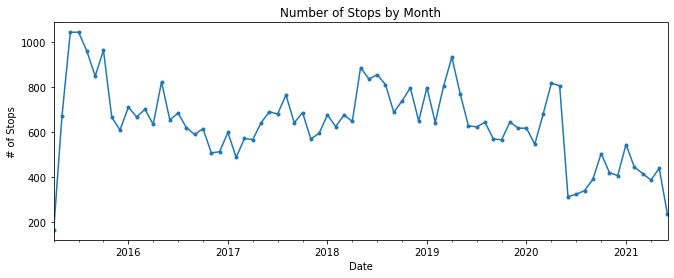

In [87]:
date.plot( marker = '.', linestyle = None, figsize = (11,4))
_=plt.title('Number of Stops by Month')
_=plt.xlabel('Date')
_=plt.ylabel('# of Stops')

In [77]:
#Looking at race of the subject.
df.subject_race.value_counts(ascending = False, dropna = False)

White                                        23452
Black or African American                    14304
Unknown                                       2735
NaN                                           1850
Hispanic                                      1684
Asian                                         1570
American Indian or Alaska Native              1375
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       65
Name: subject_race, dtype: int64

- Total: 46,146 races counted.
    * White subjects accounted for 51% of terry stops.
    * Black subjects accounted for 31% of terry stops.
    * Unknowns and NAN accounted for 10%.
        - It is worth mentioning here that there are ~4500 subjects of unidentified race.

In [80]:
#Looking at race of officers.
df.officer_race.value_counts(ascending = False, dropna = False)

White                            36171
Hispanic or Latino                2798
Two or More Races                 2726
Asian                             2079
Black or African American         1918
Not Specified                     1493
Nat Hawaiian/Oth Pac Islander      458
American Indian/Alaska Native      318
Unknown                             35
Name: officer_race, dtype: int64

In [88]:
#age of subject
df.subject_age.value_counts(dropna = False)

26 - 35         15984
36 - 45         10240
18 - 25          9576
46 - 55          6212
56 and Above     2439
17-Jan           1982
NaN              1563
Name: subject_age, dtype: int64

In [95]:
#age of officer
df.officer_age.value_counts(dropna = False, ascending = False).head()

31    3162
30    2957
33    2869
32    2831
29    2711
Name: officer_age, dtype: int64

In [84]:
df.officer_age.fillna(int(df.officer_age.mean()), inplace = True)

In [85]:
df['officer_age'] = (df.date.dt.year - df.officer_age)

In [90]:
df = df.drop(df[df.officer_age >70].index)

In [91]:
df.officer_age.describe()

count    47961.000000
mean        34.566648
std          8.420693
min         21.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         70.000000
Name: officer_age, dtype: float64